In [162]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors, KDTree
import matplotlib.pyplot as plt

In [163]:
#Read the .csv files made by the 
lower_grain = pd.read_csv("/Users/apple/Sync/Research/NiCr XPEEM/Cluster Analysis/lower_grain_particles.csv")
upper_grain = pd.read_csv("/Users/apple/Sync/Research/NiCr XPEEM/Cluster Analysis/upper_grain_particles.csv")
print(upper_grain.head())


In [165]:
#Use the sklearn k-neighbors calculation to determine the 10 nearest neighbors for each particle
nbrs_u = NearestNeighbors(n_neighbors=10)
nbrs_u.fit(upper_grain[['XM','YM']])
distances_u, indices_u = nbrs_u.kneighbors(upper_grain[['XM','YM']])


(906, 10)


array([[  0,   1,  25, ...,  24,  32,   3],
       [  1,   0,   2, ...,  15,  45,  28],
       [  2,   3,  26, ...,   4,   0,  25],
       ...,
       [903, 901, 904, ..., 893, 891, 888],
       [904, 905, 903, ..., 891, 890, 894],
       [905, 904, 903, ..., 891, 890, 894]])

In [175]:
#Print the ten nearest neighbor distances
print(np.average(distances_u,axis=0))
print(np.std(distances_u,axis=0))

[0.         0.27280264 0.34028279 0.40479835 0.46466219 0.51844961
 0.56527373 0.61356891 0.65399707 0.69568825]
[0.         0.07135585 0.0865864  0.10027051 0.10940644 0.11741599
 0.12395409 0.12976164 0.13665801 0.14678405]


(array([0.        , 0.        , 0.05862832, 0.34845133, 0.71349558,
        0.88495575, 0.96792035, 0.99225664, 0.99557522, 1.        ]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ]),
 <BarContainer object of 10 artists>)

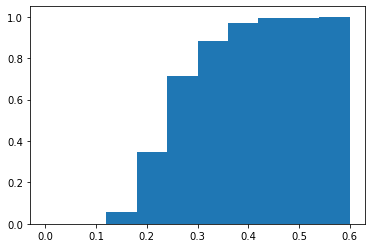

In [167]:
plt.hist(distances_u[:,1], range = (0,0.6),cumulative=True,density=True)

In [168]:
#plt.scatter(upper_grain['XM'],upper_grain['YM'],c=distances_u[:,1])

In [169]:
lower_grain.head()

,Particle ID,Area (um^2),Average intensity,STDEV,Min,Max,XM,YM,Perimeter,%Area
0,1,0.010,255.0,0.0,255,255,23.650,8.500,0.283,100.0
1,2,0.010,255.0,0.0,255,255,20.850,9.900,0.283,100.0
2,3,0.015,255.0,0.0,255,255,23.167,10.783,0.424,100.0
3,4,0.020,255.0,0.0,255,255,19.006,10.838,0.495,100.0
4,5,0.025,255.0,0.0,255,255,18.910,11.700,0.595,100.0


In [170]:
nbrs_l = NearestNeighbors(n_neighbors=10)
nbrs_l.fit(lower_grain[['XM','YM']])
distances_l, indices_l = nbrs_l.kneighbors(lower_grain[['XM','YM']])
print(indices_l.shape)

(374, 10)


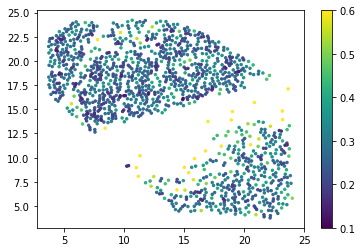

In [171]:
plt.scatter(upper_grain['XM'],25.6-upper_grain['YM'],c=distances_u[:,1], vmin = 0.1, vmax=0.6, s = 6)
plt.scatter(lower_grain['XM'],25.6-lower_grain['YM'],c=distances_l[:,1], vmin=0.1, vmax = 0.6, s = 6)
plt.colorbar()


In [176]:
print(np.average(distances_l,axis=0))
print(np.std(distances_l,axis=0))

[0.         0.34185409 0.4459409  0.5288416  0.61052295 0.68701741
 0.75242616 0.81245504 0.87521855 0.92567211]
[0.         0.19932241 0.24913496 0.26801521 0.29966779 0.33024882
 0.34422854 0.35383852 0.37906649 0.39473786]


Text(0, 0.5, 'distance (um)')

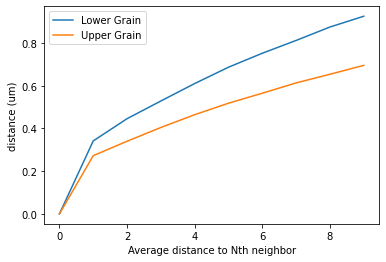

In [173]:
plt.plot(np.average(distances_l, axis=0))
plt.plot(np.average(distances_u, axis=0))
plt.legend(["Lower Grain","Upper Grain"])
plt.xlabel("Average distance to Nth neighbor")
plt.ylabel("distance (um)")

Text(0, 0.5, 'Frequency')

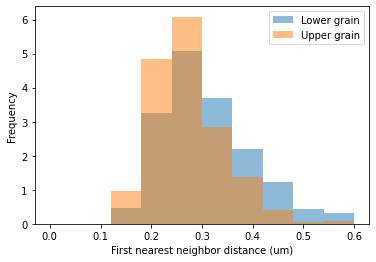

In [174]:
plt.hist(distances_l[:,1], range = (0,0.6),density=True,alpha=0.5)
plt.hist(distances_u[:,1], range = (0,0.6),density=True,alpha = 0.5)
plt.legend(["Lower grain", "Upper grain"])
plt.xlabel("First nearest neighbor distance (um)")
plt.ylabel("Frequency")